Brute Force Colors: 5


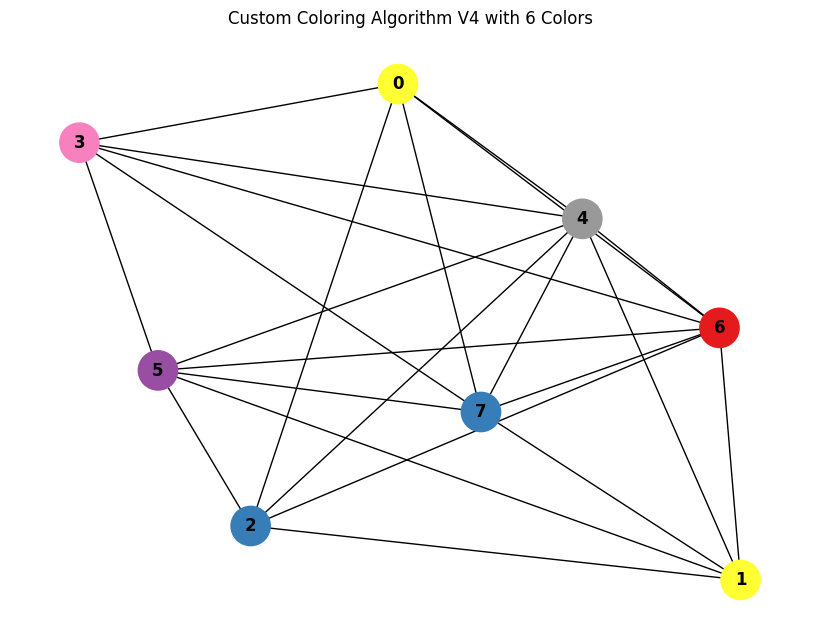

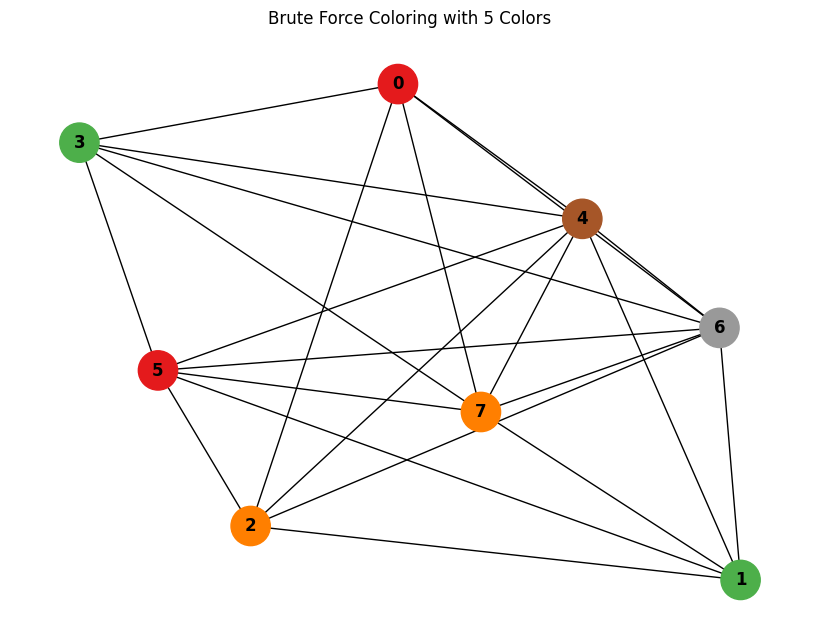

{'Version 4 Colors': 6,
 'Version 4 Time': 0.0003364086151123047,
 'Brute Force Colors': 5,
 'Brute Force Time': 0.4358992576599121,
 'Brute Force Coloring': {0: 0, 1: 1, 2: 2, 3: 1, 4: 3, 5: 0, 6: 4, 7: 2}}

In [103]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import itertools

def custom_coloring_algorithm_v4(G):
    # Step 1: Initial 2-Color Subgraph Coloring
    color_map = {}
    current_color = 0

    for node in G.nodes:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    color_map[current_node] = current_color
                    # Enqueue non-adjacent nodes
                    for neighbor in G.neighbors(current_node):
                        if neighbor not in color_map:
                            to_color.append(neighbor)
            # Alternate between two colors
            current_color = 1 - current_color

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map[edge[0]], color_map[edge[1]], color_map[u]}
                remaining_color = available_colors - assigned_colors
                if len(remaining_color) > 0:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Ensure adjacent nodes have different colors with influence from adjacent colors
    for node in G.nodes:
        used_colors = {color_map[neighbor] for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map[node] in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

def is_valid_coloring(G, coloring):
    """Check if the given coloring is valid (i.e., no two adjacent nodes have the same color)."""
    for u, v in G.edges:
        if coloring[u] == coloring[v]:
            return False
    return True

def brute_force_coloring(G):
    """Brute-force approach to find the minimum coloring of the graph."""
    # Get nodes
    nodes = list(G.nodes)
    n = len(nodes)
    
    # Try all color assignments
    for k in range(1, n + 1):
        for coloring in itertools.product(range(k), repeat=n):
            coloring_dict = dict(zip(nodes, coloring))
            if is_valid_coloring(G, coloring_dict):
                return coloring_dict, k
    return None, n  # Fallback in case no valid coloring is found


# Create a test graph
G = nx.erdos_renyi_graph(8, 0.8) 

# Apply Version 4 custom coloring algorithm
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v4(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results



def enhanced_coloring_algorithm(G):
    # Step 1: Initial Coloring using Welsh-Powell Algorithm
    color_map = {}
    nodes_sorted = sorted(G.nodes, key=lambda x: G.degree(x), reverse=True)
    current_color = 0

    for node in nodes_sorted:
        used_colors = {color_map[neighbor] for neighbor in G.neighbors(node) if neighbor in color_map}
        for color in range(current_color, len(used_colors) + 1):
            if color not in used_colors:
                color_map[node] = color
                break
        else:
            color_map[node] = len(used_colors)
            current_color = max(current_color, len(used_colors))

    # Step 2: Recoloring Triangles Efficiently
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map[edge[0]], color_map[edge[1]], color_map[u]}
                remaining_color = available_colors - assigned_colors
                if len(remaining_color) > 0:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2
     # Step 3: Ensure adjacent nodes have different colors efficiently
    for node in G.nodes:
        used_colors = {color_map[neighbor] for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map[node] in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

def plot_colored_graph(G, color_map):
    # Create a color map for plotting
    colors = [color_map[node] for node in G.nodes]

    # Draw the graph
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, node_color=colors, with_labels=True, node_size=700, cmap=plt.cm.rainbow)
    plt.figure(figsize=(8, 6))
    plt.show()

 # Random graph with 10 nodes and 30% edge probability

    # Apply the enhanced coloring algorithm
#color_map = enhanced_coloring_algorithm(G)

    # Plot the colored graph
#plot_colored_graph(G, color_map)

results


Brute Force Colors: 5


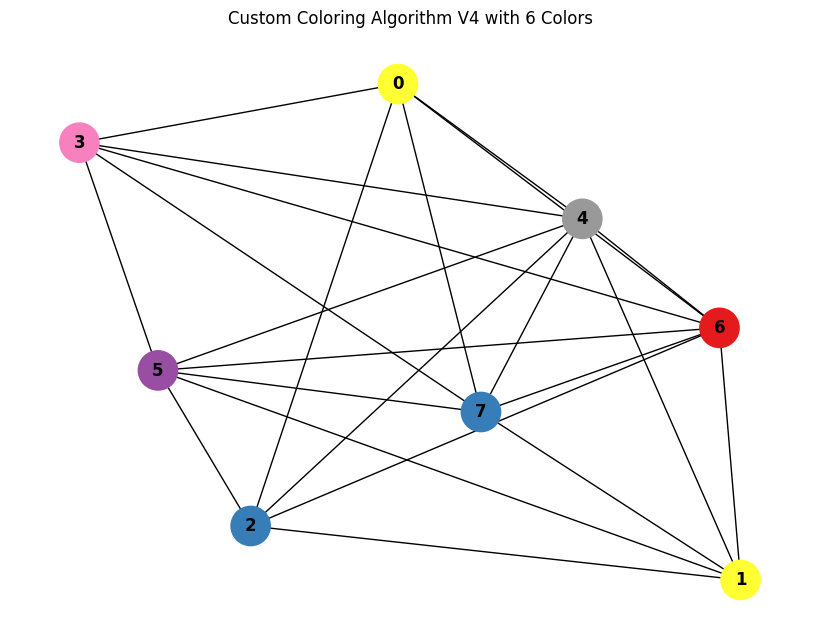

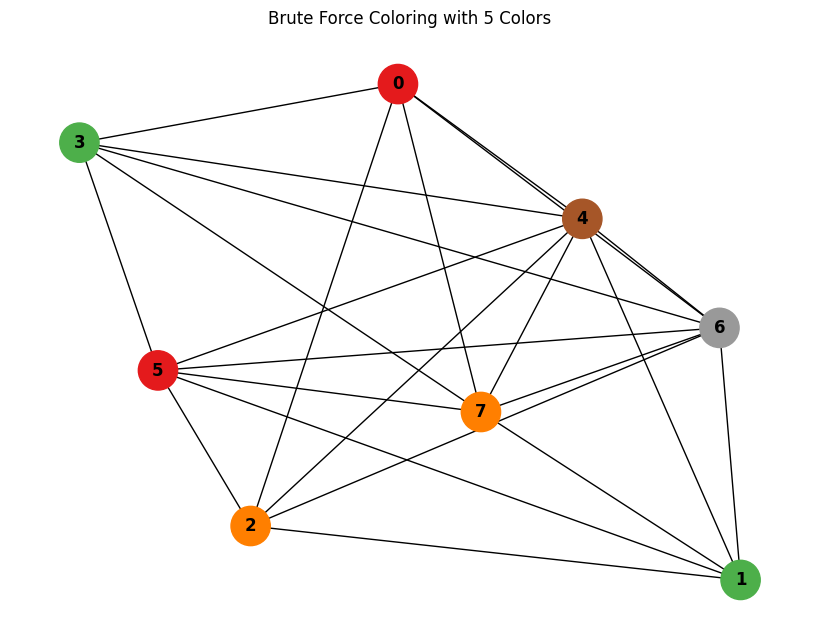

{'Version 4 Colors': 6,
 'Version 4 Time': 0.00034046173095703125,
 'Brute Force Colors': 5,
 'Brute Force Time': 0.42321038246154785,
 'Brute Force Coloring': {0: 0, 1: 1, 2: 2, 3: 1, 4: 3, 5: 0, 6: 4, 7: 2}}

In [104]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import itertools

def custom_coloring_algorithm_v4(G):
    # Step 1: Initial 2-Color Subgraph Coloring
    color_map = {}
    current_color = 0

    # Priority queue to color nodes with fewer neighbors first
    nodes_by_degree = sorted(G.nodes, key=lambda x: len(list(G.neighbors(x))))

    for node in nodes_by_degree:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    # Find the first valid color for the current node
                    adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(current_node) if neighbor in color_map}
                    available_colors = {0, 1, 2}
                    remaining_colors = available_colors - adjacent_colors
                    if remaining_colors:
                        new_color = remaining_colors.pop()
                    else:
                        # If no color is available, assign a new color
                        new_color = len(available_colors)
                        available_colors.add(new_color)

                    color_map[current_node] = new_color

                    # Enqueue non-adjacent nodes
                    for neighbor in G.neighbors(current_node):
                        if neighbor not in color_map:
                            to_color.append(neighbor)

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map.get(edge[0], -1), color_map.get(edge[1], -1), color_map.get(u, -1)}
                remaining_color = available_colors - assigned_colors
                if remaining_color:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Ensure adjacent nodes have different colors
    for node in G.nodes:
        used_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map.get(node) in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

def is_valid_coloring(G, coloring):
    """Check if the given coloring is valid (i.e., no two adjacent nodes have the same color)."""
    for u, v in G.edges:
        if coloring[u] == coloring[v]:
            return False
    return True

def brute_force_coloring(G):
    """Brute-force approach to find the minimum coloring of the graph."""
    # Get nodes
    nodes = list(G.nodes)
    n = len(nodes)
    
    # Try all color assignments
    for k in range(1, n + 1):
        for coloring in itertools.product(range(k), repeat=n):
            coloring_dict = dict(zip(nodes, coloring))
            if is_valid_coloring(G, coloring_dict):
                return coloring_dict, k
    return None, n  # Fallback in case no valid coloring is found

# Create a test graph
#G = nx.erdos_renyi_graph(7, 0.5) 

# Apply Version 4 custom coloring algorithm
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v4(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results
results


Brute Force Colors: 5


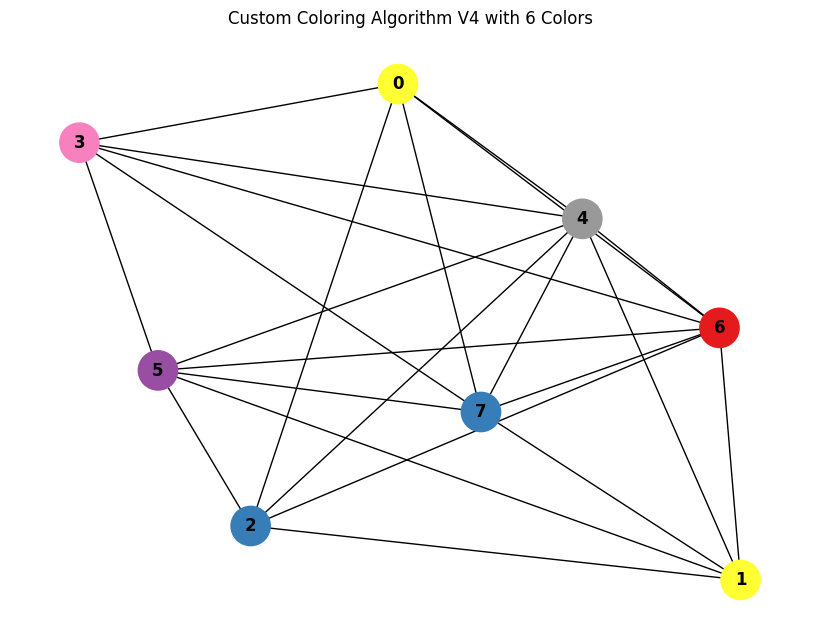

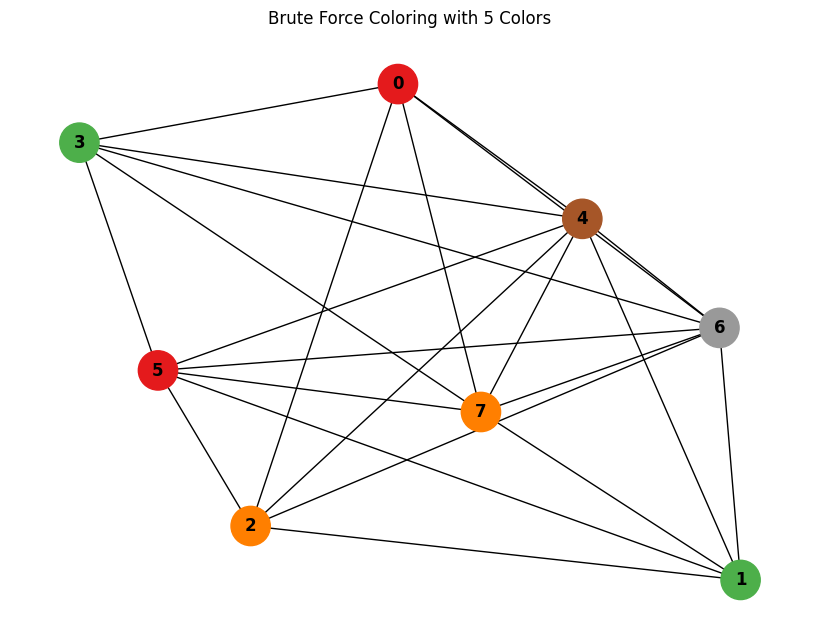

{'Version 4 Colors': 6,
 'Version 4 Time': 0.00039386749267578125,
 'Brute Force Colors': 5,
 'Brute Force Time': 0.44962048530578613,
 'Brute Force Coloring': {0: 0, 1: 1, 2: 2, 3: 1, 4: 3, 5: 0, 6: 4, 7: 2}}

In [105]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import itertools

def custom_coloring_algorithm_v4(G):
    # Step 1: Initial Coloring
    color_map = {}
    current_color = 0

    # Priority queue to color nodes with fewer neighbors first
    nodes_by_degree = sorted(G.nodes, key=lambda x: len(list(G.neighbors(x))))

    for node in nodes_by_degree:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    # Find the first valid color for the current node
                    adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(current_node) if neighbor in color_map}
                    available_colors = {0, 1, 2}
                    remaining_colors = available_colors - adjacent_colors
                    if remaining_colors:
                        new_color = remaining_colors.pop()
                    else:
                        # If no color is available, assign a new color
                        new_color = len(available_colors)
                        available_colors.add(new_color)

                    color_map[current_node] = new_color

                    # Enqueue non-adjacent nodes
                    for neighbor in G.nodes:
                        if neighbor not in color_map and neighbor not in G.neighbors(current_node):
                            to_color.append(neighbor)

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map.get(edge[0], -1), color_map.get(edge[1], -1), color_map.get(u, -1)}
                remaining_color = available_colors - assigned_colors
                if remaining_color:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Ensure adjacent nodes have different colors
    for node in G.nodes:
        used_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map.get(node) in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

def is_valid_coloring(G, coloring):
    """Check if the given coloring is valid (i.e., no two adjacent nodes have the same color)."""
    for u, v in G.edges:
        if coloring[u] == coloring[v]:
            return False
    return True

def brute_force_coloring(G):
    """Brute-force approach to find the minimum coloring of the graph."""
    # Get nodes
    nodes = list(G.nodes)
    n = len(nodes)
    
    # Try all color assignments
    for k in range(1, n + 1):
        for coloring in itertools.product(range(k), repeat=n):
            coloring_dict = dict(zip(nodes, coloring))
            if is_valid_coloring(G, coloring_dict):
                return coloring_dict, k
    return None, n  # Fallback in case no valid coloring is found

# Create a test graph
#G = nx.erdos_renyi_graph(7, 0.5) 

# Apply Version 4 custom coloring algorithm
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v4(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results
results


Brute Force Colors: 5


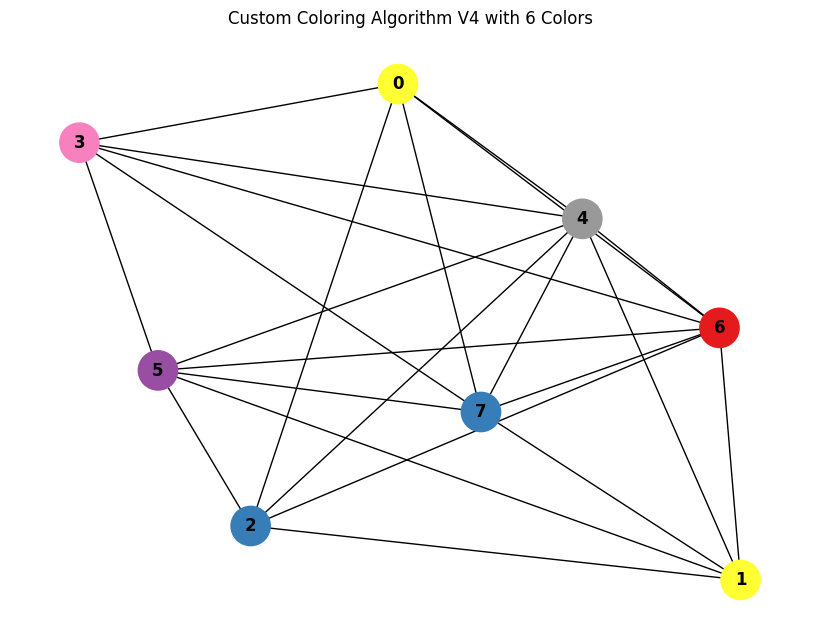

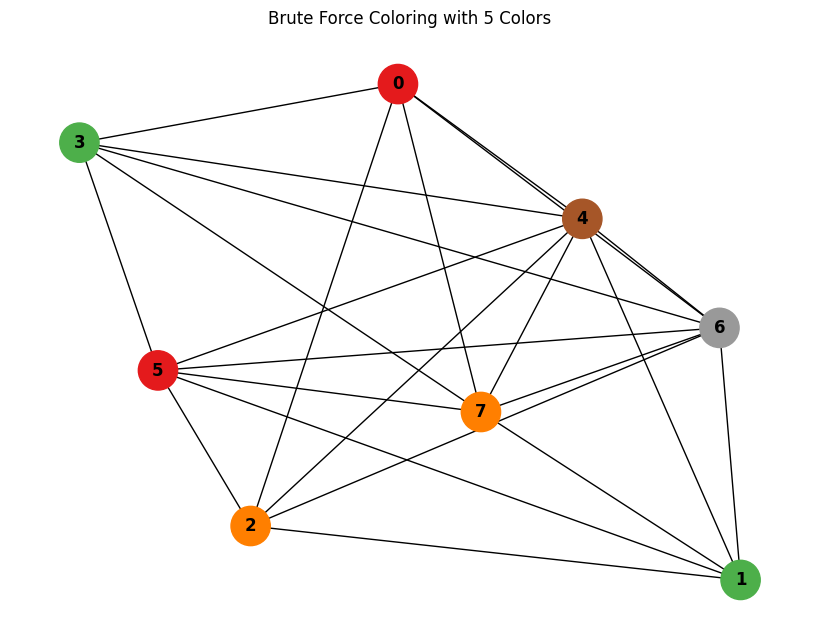

{'Version 4 Colors': 6,
 'Version 4 Time': 0.002283811569213867,
 'Brute Force Colors': 5,
 'Brute Force Time': 0.40761756896972656,
 'Brute Force Coloring': {0: 0, 1: 1, 2: 2, 3: 1, 4: 3, 5: 0, 6: 4, 7: 2}}

In [106]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import itertools

def custom_coloring_algorithm_v4(G):
    # Step 1: Initial Coloring
    color_map = {}
    current_color = 0

    # Priority queue to color nodes with fewer neighbors first
    nodes_by_degree = sorted(G.nodes, key=lambda x: len(list(G.neighbors(x))))

    for node in nodes_by_degree:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    # Find the first valid color for the current node
                    adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(current_node) if neighbor in color_map}
                    available_colors = {0, 1, 2}
                    remaining_colors = available_colors - adjacent_colors
                    if remaining_colors:
                        new_color = remaining_colors.pop()
                    else:
                        # If no color is available, assign a new color
                        new_color = len(available_colors)
                        available_colors.add(new_color)

                    color_map[current_node] = new_color

                    # Enqueue non-adjacent nodes
                    for neighbor in G.nodes:
                        if neighbor not in color_map and neighbor not in G.neighbors(current_node):
                            to_color.append(neighbor)

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map.get(edge[0], -1), color_map.get(edge[1], -1), color_map.get(u, -1)}
                remaining_color = available_colors - assigned_colors
                if remaining_color:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Color Non-Adjacent Nodes with Same Neighbor Colors
    nodes_to_check = list(G.nodes)
    for node in nodes_to_check:
        if node not in color_map:
            continue
        current_color = color_map[node]
        same_neighbors = []
        for other_node in G.nodes:
            if other_node != node and other_node not in color_map:
                # Check if they have the same neighbors' colors
                neighbors = set(G.neighbors(node))
                other_neighbors = set(G.neighbors(other_node))
                if neighbors == other_neighbors:
                    same_neighbors.append(other_node)
        
        if same_neighbors:
            for same_node in same_neighbors:
                color_map[same_node] = current_color

    # Step 4: Ensure Adjacent Nodes Have Different Colors
    for node in G.nodes:
        used_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map.get(node) in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

def is_valid_coloring(G, coloring):
    """Check if the given coloring is valid (i.e., no two adjacent nodes have the same color)."""
    for u, v in G.edges:
        if coloring[u] == coloring[v]:
            return False
    return True

def brute_force_coloring(G):
    """Brute-force approach to find the minimum coloring of the graph."""
    # Get nodes
    nodes = list(G.nodes)
    n = len(nodes)
    
    # Try all color assignments
    for k in range(1, n + 1):
        for coloring in itertools.product(range(k), repeat=n):
            coloring_dict = dict(zip(nodes, coloring))
            if is_valid_coloring(G, coloring_dict):
                return coloring_dict, k
    return None, n  # Fallback in case no valid coloring is found

# Create a test graph
#G = nx.erdos_renyi_graph(7, 0.8) 

# Apply Version 4 custom coloring algorithm
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v4(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results
results


In [107]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import itertools

def custom_coloring_algorithm_v4(G):
    # Step 1: Initial 2-Color Subgraph Coloring
    color_map = {}
    current_color = 0

    # Priority queue to color nodes with fewer neighbors first
    nodes_by_degree = sorted(G.nodes, key=lambda x: len(list(G.neighbors(x))))

    for node in nodes_by_degree:
        if node not in color_map:
            # Start coloring the subgraph with current color
            to_color = [node]
            while to_color:
                current_node = to_color.pop()
                if current_node not in color_map:
                    # Find the first valid color for the current node
                    adjacent_colors = {color_map.get(neighbor) for neighbor in G.neighbors(current_node) if neighbor in color_map}
                    available_colors = {0, 1, 2}
                    new_color = (available_colors - adjacent_colors).pop()
                    color_map[current_node] = new_color

                    # Enqueue non-adjacent nodes
                    for neighbor in G.neighbors(current_node):
                        if neighbor not in color_map:
                            to_color.append(neighbor)

    # Step 2: Recoloring Triangles
    for edge in G.edges:
        for u in G.neighbors(edge[0]):
            if u != edge[1] and G.has_edge(u, edge[1]):
                # Found a triangle (edge[0], edge[1], u)
                # Recolor all three nodes with different colors
                available_colors = {0, 1, 2}
                assigned_colors = {color_map.get(edge[0], -1), color_map.get(edge[1], -1), color_map.get(u, -1)}
                remaining_color = available_colors - assigned_colors
                if len(remaining_color) > 0:
                    color_map[u] = remaining_color.pop()
                # Recolor the nodes if needed
                color_map[edge[0]] = 0
                color_map[edge[1]] = 1
                color_map[u] = 2

    # Step 3: Ensure adjacent nodes have different colors
    for node in G.nodes:
        used_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
        if color_map.get(node) in used_colors:
            # Reassign color to avoid conflicts
            for color in range(len(used_colors) + 1):
                if color not in used_colors:
                    color_map[node] = color
                    break

    return color_map

def is_valid_coloring(G, coloring):
    """Check if the given coloring is valid (i.e., no two adjacent nodes have the same color)."""
    for u, v in G.edges:
        if coloring[u] == coloring[v]:
            return False
    return True

def brute_force_coloring(G):
    """Brute-force approach to find the minimum coloring of the graph."""
    # Get nodes
    nodes = list(G.nodes)
    n = len(nodes)
    
    # Try all color assignments
    for k in range(1, n + 1):
        for coloring in itertools.product(range(k), repeat=n):
            coloring_dict = dict(zip(nodes, coloring))
            if is_valid_coloring(G, coloring_dict):
                return coloring_dict, k
    return None, n  # Fallback in case no valid coloring is found



# Apply Version 4 custom coloring algorithm
start_time_v4 = time.time()
color_map_v4 = custom_coloring_algorithm_v4(G)
end_time_v4 = time.time()

# Apply Brute Force coloring algorithm
start_time_brute = time.time()
brute_coloring, min_colors = brute_force_coloring(G)
end_time_brute = time.time()

# Results
results = {
    "Version 4 Colors": len(set(color_map_v4.values())),
    "Version 4 Time": end_time_v4 - start_time_v4,
    "Brute Force Colors": min_colors,
    "Brute Force Time": end_time_brute - start_time_brute,
    "Brute Force Coloring": brute_coloring
}

# Output results
print(f'Brute Force Colors: {min_colors}')

# Plot the graph with Version 4 coloring
pos = nx.spring_layout(G, seed=42)  # Create a position layout for reproducibility
colors_v4 = [color_map_v4[node] for node in G.nodes]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=colors_v4, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
plt.title(f'Custom Coloring Algorithm V4 with {len(set(colors_v4))} Colors')
plt.show()

# Plot the graph with brute-force coloring
if brute_coloring:
    colors_brute = [brute_coloring[node] for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=colors_brute, with_labels=True, cmap=plt.cm.Set1, node_size=800, font_weight='bold')
    plt.title(f'Brute Force Coloring with {min_colors} Colors')
    plt.show()

# Output results
results


KeyError: 'pop from an empty set'